In [ ]:
# importing the used Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
# importing the DataFrame
df = pd.read_csv("car_price_prediction_.csv")

In [ ]:
df.head(20)

In [59]:
null_counts = df.isnull().sum()

In [60]:
null_counts

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [61]:
print(df.describe())

           Car ID       Year  Engine Size        Mileage         Price
count  2500.00000  2500.0000  2500.000000    2500.000000   2500.000000
mean   1250.50000  2011.6268     3.465240  149749.844800  52638.022532
std     721.83216     6.9917     1.432053   87919.952034  27295.833455
min       1.00000  2000.0000     1.000000      15.000000   5011.270000
25%     625.75000  2005.0000     2.200000   71831.500000  28908.485000
50%    1250.50000  2012.0000     3.400000  149085.000000  53485.240000
75%    1875.25000  2018.0000     4.700000  225990.500000  75838.532500
max    2500.00000  2023.0000     6.000000  299967.000000  99982.590000


In [62]:
unique_brands = df['Brand'].unique()
print(unique_brands)

['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota']


In [63]:
numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               Car ID      Year  Engine Size   Mileage     Price
Car ID       1.000000  0.008050     0.000059 -0.035840  0.004650
Year         0.008050  1.000000     0.011833  0.002282 -0.036805
Engine Size  0.000059  0.011833     1.000000 -0.015782 -0.004420
Mileage     -0.035840  0.002282    -0.015782  1.000000 -0.008567
Price        0.004650 -0.036805    -0.004420 -0.008567  1.000000


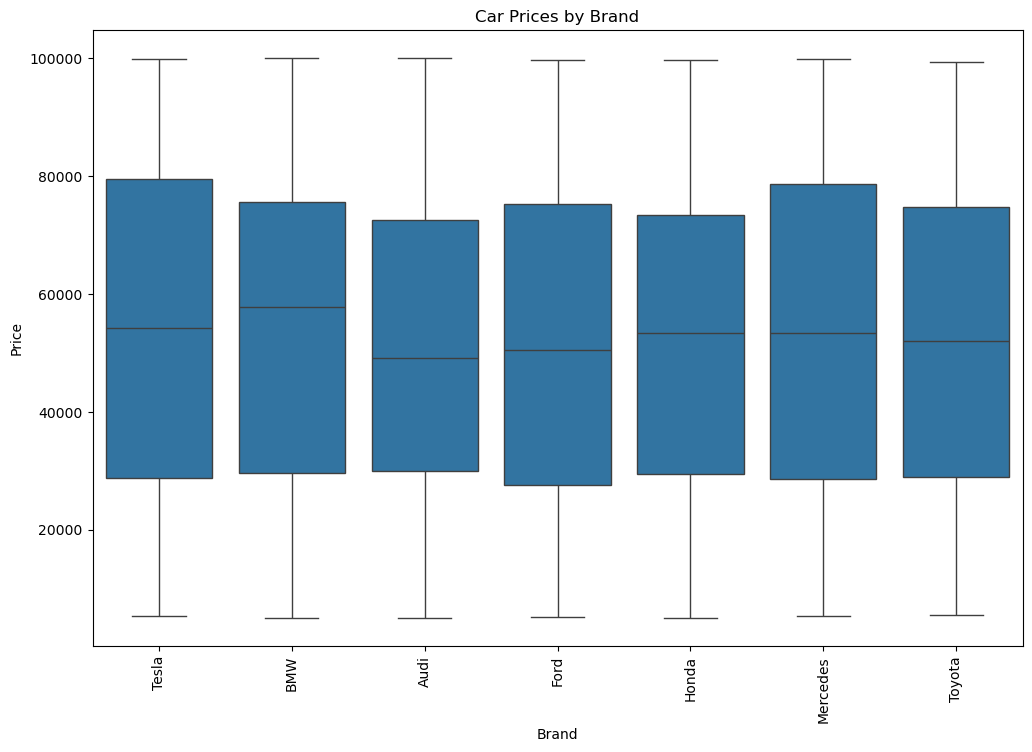

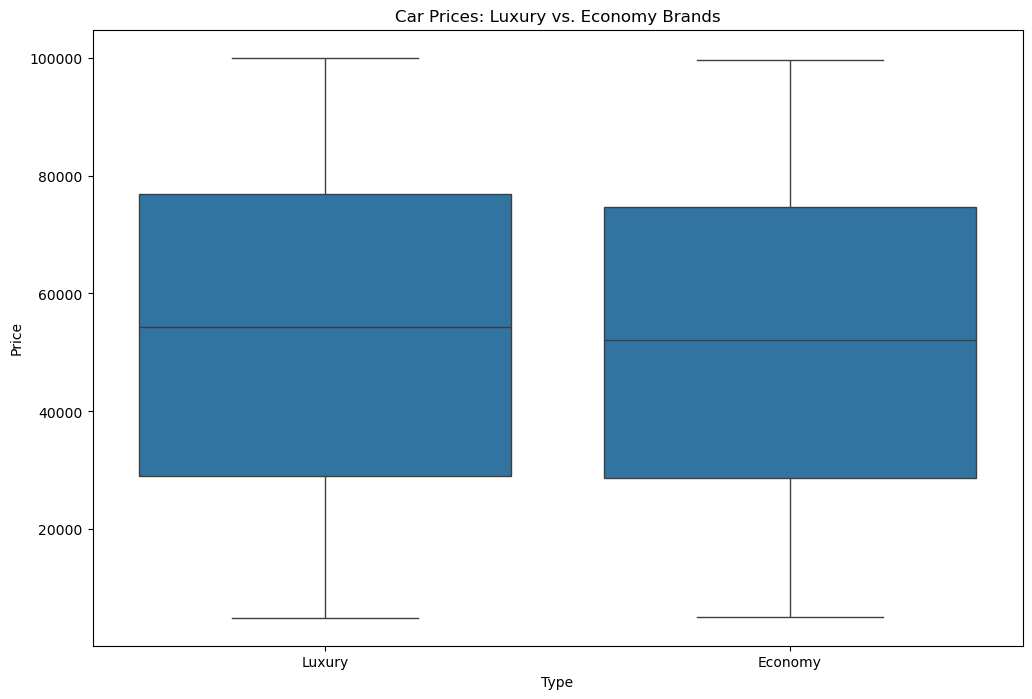

T-test statistic: 1.152661142356886
P-value: 0.2491597862307123
There is no significant difference in prices between luxury and economy brands.


In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Car Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

luxury_brands = ['Mercedes', 'BMW', 'Audi', 'Tesla']
df['luxury'] = df['Brand'].apply(lambda x: 'Luxury' if x in luxury_brands else 'Economy')

plt.figure(figsize=(12, 8))
sns.boxplot(x='luxury', y='Price', data=df)
plt.title('Car Prices: Luxury vs. Economy Brands')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()


luxury_prices = df[df['luxury'] == 'Luxury']['Price']
economy_prices = df[df['luxury'] == 'Economy']['Price']

t_stat, p_val = ttest_ind(luxury_prices, economy_prices)

print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')

if p_val < 0.05:
    print("There is a significant difference in prices between luxury and economy brands.")
else:
    print("There is no significant difference in prices between luxury and economy brands.")


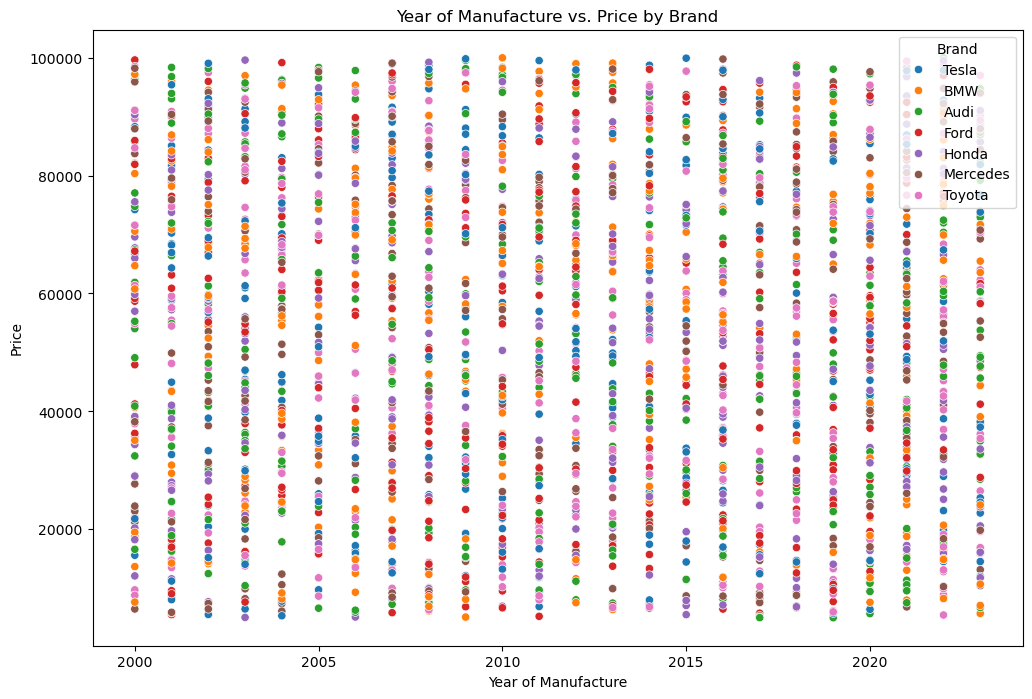

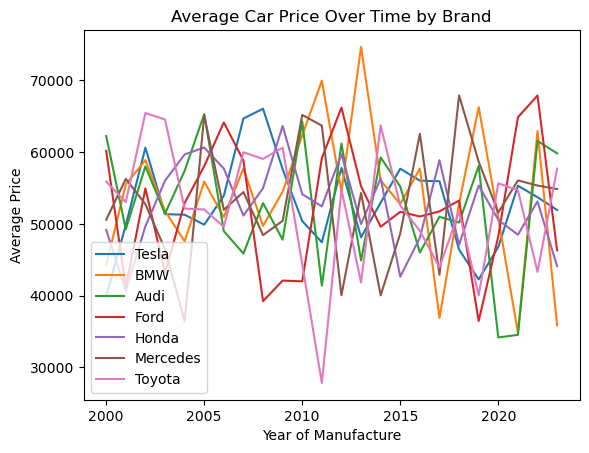

In [65]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='Price', hue='Brand', data=df)
plt.title('Year of Manufacture vs. Price by Brand')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.show()

for brand in unique_brands:
    brand_data = df[df['Brand'] == brand]
    avg_price_per_year = brand_data.groupby('Year')['Price'].mean()
    
    plt.plot(avg_price_per_year.index, avg_price_per_year.values, label=brand)

plt.title('Average Car Price Over Time by Brand')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Price')
plt.legend()
plt.show()


In [66]:
# Group by department and calculate the average salary
# grouped_df = df.groupby('Brand')['Price'].mean()

# # Save the result to a new CSV file
# grouped_df.to_csv('average_salary_by_department.csv')


# grouped_df = df.groupby('Brand')
# print(group)

# df_bp = df[['Brand', 'Price']]
df.columns


Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model', 'luxury'],
      dtype='object')

In [67]:
# import pandas as pd

# # Sample DataFrame
# data = {
#     'brand': ['Toyota', 'BMW', 'Mercedes', 'Toyota', 'BMW', 'Honda'],
#     'price': [20000, 35000, 45000, 22000, 33000, 18000],
#     'year': [2010, 2012, 2015, 2011, 2014, 2013],
#     'color': ['Red', 'Blue', 'Black', 'White', 'Silver', 'Green']
# }

# df = pd.DataFrame(data)

# # Select specific columns
# selected_columns = df[['brand', 'price']]
# print(selected_columns)


In [68]:
print(df)

      Car ID   Brand  Year  Engine Size Fuel Type Transmission  Mileage  \
0          1   Tesla  2016          2.3    Petrol       Manual   114832   
1          2     BMW  2018          4.4  Electric       Manual   143190   
2          3    Audi  2013          4.5  Electric       Manual   181601   
3          4   Tesla  2011          4.1    Diesel    Automatic    68682   
4          5    Ford  2009          2.6    Diesel       Manual   223009   
...      ...     ...   ...          ...       ...          ...      ...   
2495    2496    Audi  2020          2.4    Petrol    Automatic    22650   
2496    2497    Audi  2001          5.7    Hybrid       Manual    77701   
2497    2498    Ford  2021          1.1    Hybrid       Manual   272827   
2498    2499    Audi  2002          4.5    Diesel       Manual   229164   
2499    2500  Toyota  2005          4.6    Diesel    Automatic    80978   

     Condition     Price     Model   luxury  
0          New  26613.92   Model X   Luxury  
1      

In [69]:
df_new = df[['Brand', 'Price']]

In [70]:
df_new

,Brand,Price
0,Tesla,26613.92
1,BMW,14679.61
2,Audi,44402.61
3,Tesla,86374.33
4,Ford,73577.10
...,...,...
2495,Audi,61384.10
2496,Audi,24710.35
2497,Ford,29902.45
2498,Audi,46085.67


In [ ]:
grouped_df = df_new.groupby('Brand')['Price'].mean()
print(grouped_df)

In [ ]:
grouped_df.max()

In [ ]:
grouped_df_max = df_new.groupby('Brand')['Price'].max()
print(grouped_df_max)

In [81]:
grouped_df_max.max()

99982.59